## Exponential data


Let's consider the case of exponential data. For example, suppose you're waiting for a bus that you think comes on average once every ten minutes, but you're not sure exactly how often it comes. We'll say $Y \sim Exp(\lambda)$. Your waiting time has a prior expectation of one over lambda. It turns out, the gamma distribution is conjugate for an exponential likelihood. Gammas actually are conjugate for a number of different things.  

Your waiting time has a prior expectation of $\dfrac{1}{\lambda}$. It turns out, the gamma distribution is conjugate for an exponential likelihood. 
We need to specify a prior, so a particular gamma in this case. If we think that the buses come on average every ten minutes, that's a rate of $\dfrac{1}{10}$. So our prior mean should be $\dfrac{1}{10}$. Thus, we'll want to specify a gamma distribution, this first parameter divided by a second parameter is $\dfrac{1}{10}$.  

We can think that about our variability. Perhaps you want to specify a prior, which is a $\Gamma(100,1000)$. This will indeed have prior mean of $$\dfrac{1}{10}$$, and it'll have a prior standard deviation, Of $$\dfrac{1}{10}$$ Thus if we think as a rough approximate of a mean plus or minus two standard deviations as a rough interval for our prior, we would say we're looking at $0.1$ plus or minus $0.02$ as a possible range for this rate parameter. 

So, here's a particular prior we could specify. 

Now, you want to update you posterior for $\lambda$ about how often this bus will arrive. So : $$P(\lambda|y) \propto P(y|\lambda) P(\lambda) $$$$\propto \lambda e^{-\lambda y} \lambda^{\alpha -1} e^{-\beta\lambda}$$ $$\propto \lambda^{\alpha +1} e^{-(\beta + y)\lambda}$$

We can now say that lambda given $y|\lambda \sim \Gamma(\alpha + 1, \beta + y)$.

Suppose that we wait for $12$ minutes, and a bus arrives. 

$$\Gamma(101, 1012)$$ 
posterior mean : $\dfrac{101}{1012} = 0.998 = \dfrac{1}{10.12}$

**Review Exponential Data **

**Question 1**

Recall that we used the conjugate gamma prior for $\lambda$, the arrival rate in busses per minute. Suppose our prior belief about this rate is that it should have mean $\dfrac{1}{20}$ arrivals per minute with standard deviation $\dfrac{1}{5}$. Then the prior is $Gamma(a,b)$ with $a=\dfrac{1}{16}$.

Find the value of b.

**Answer 1**

In [34]:
mean <- 1/20
std <- 1/5
a <- 1/16
b <- a/mean
b

[1] 1.25

Bus waiting times:

Suppose that we wish to use a prior with the same mean $\dfrac{1}{20}$, but with effective sample size of one arrival. Then the prior for $\lambda$ is $Gamma(1,20)$. 

In addition to the original $Y_{1}=12$, we observe the waiting times for four additional busses: $Y_{2}=15$, $Y_{3}=8$, $Y_{4}=13.5$, $Y_{5}=25$.

Recall that with multiple (independent) observations, the posterior for $\lambda$ is $Gamma(\alpha,\beta)$ where $\alpha=a+n$ and $\beta=b+\sum y_{i}$.

** Question 2**

What is the posterior mean for λ?

**Answer 2**


In [35]:
mean <- 1/20
a <- 1
b <- a/mean
waiting_times <- c(15, 8, 13.5, 25)
alpha <- a + length(waiting_times)+1
beta <- b + sum(waiting_times)+12
post_mean <- alpha/beta
post_mean


[1] 6

[1] 93.5

[1] 0.06417112

**Question 3**
Find the posterior probability that $\lambda<1/10$.

**Answer 3**

In [36]:
pgamma(q=1/10, shape=alpha, rate=beta)

[1] 0.9039699

The United States Geological Survey maintains a list of significant earthquakes worldwide. We will model the rate of earthquakes of magnitude 4.0+ in the state of California during 2015. An iid exponential model on the waiting time between significant earthquakes is appropriate if we assume:

    1. earthquake events are independent,
    2. the rate at which earthquakes occur does not change during the year, and
    3. the earthquake hazard rate does not change (i.e., the probability of an earthquake happening tomorrow is constant regardless of whether the previous earthquake was yesterday or 100 days ago).

Let $Y_{i}$ denote the waiting time in days between the ith earthquake and the following earthquake. Our model is $Yi\stackrel{iid}{\sim} Exp(\lambda)$ where the expected waiting time between earthquakes is $E(Y)=\dfrac{1}{\lambda}$ days.

Assume the conjugate prior $\lambda∼Gamma(a,b)$. Suppose our prior expectation for $\lambda$ is $\dfrac{1}{30}$, and we wish to use a prior effective sample size of one interval between earthquakes.

** Question 4**

What is the value of a?

**Answer 4**

In [37]:
eff_sample <- 1
a <- eff_sample
a

[1] 1

** Question 5**

What is the value of b?

**Answer 5**

In [38]:
lambda <- 1/30
b <- a/lambda
b

[1] 30

The significant earthquakes of magnitude 4.0+ in the state of California during 2015 occurred on the following dates (http://earthquake.usgs.gov/earthquakes/browse/significant.php?year=2015):

January 4, January 20, January 28, May 22, July 21, July 25, August 17, September 16, December 30.

**Questiom 6**

Recall that we are modeling the waiting times between earthquakes in days. Which is our data vector?

**Answer 6**

In [39]:
y <- c(16, 8, 114, 60, 4, 23, 30, 105)

**Question 7** 

The posterior distribution is λ∣y∼Gamma(α,β). What is the value of α?

**Answer 7**

In [40]:
post_a <- a + length(y); post_a


[1] 9

**Question 8** 

The posterior distribution is λ∣y∼Gamma(α,β). What is the value of β?

**Answer 8**

In [41]:
post_b <- b + sum(y); post_b

[1] 390

**Question 9**

Calculate the upper end of the 95% equal-tailed credible interval for λ, the rate of major earthquakes in events per day. Round your answer to two decimal places.

**Answer 9**

In [42]:
qgamma(p=0.975, shape=post_a, rate=post_b)

[1] 0.04041843

The posterior predictive density for a new waiting time y^{∗} in days is:

$f(y^{∗}∣y)=\int f(y^{∗}∣λ)⋅f(λ∣y)dλ=\dfrac{β^{α}Γ(α+1)}{(β+y^{∗})^{α+1}Γ(α)}I_{\{y^{∗}≥0\}}=\dfrac{β^{α}α}{(β+y^{∗})^{α+1}}I{\{y∗≥0\}}$

where $f(λ∣y)$ is the Gamma(α,β) posterior found earlier.

**Question 10**

Plot the graph that  shows the posterior predictive distribution for y^{∗}


[1] 0.02307692

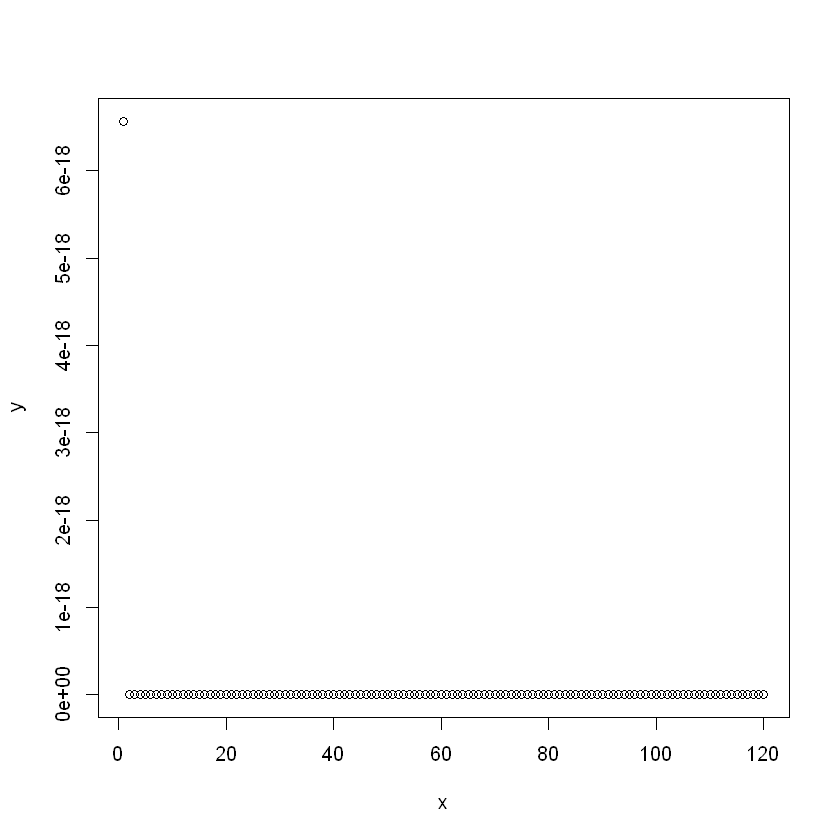

In [43]:
x <- 1:120
post_lambda <- post_a/post_b
y <- dexp(x, rate = 1/post_lambda)
plot(x, y)
post_lambda

## Normal Data

### Normal likelihood with variance known

The normal distribution arises in a wide variety of contexts. Including heights of people, manufacturing industrial processes and as a result of the central limit theorem. 

Let's take the occasion that we know the variation. This is the situation that often arises in monitoring of industrial production processes. So we'll say  $X_{i} \stackrel{iid}{\sim}N(\mu, \sigma^{2})$. 

How would we choose a prior for mu? 

We'd like to use a conjugate prior, it would be convenient. It turns out the normal is conjugate for itself for its mean parameter. 

So we'll specify a prior for mu, $\mu \stackrel{iid}{\sim}N(m, s^{2})$.

I'm putting on noughts to specify particular values in this case. That these are not parameters. The posterior then mu given the data x. 

The posterior then mu given the data x shall be: 

$$f(\mu|x) \propto f(x|\mu) f(\mu) $$

After conducting many calculations which are beyond the scope of this document we derive that : 
$$\mu | x \sim N(\dfrac{\dfrac{n\bar{x}}{\sigma^{2}} + \dfrac{m}{s^{2}}}{\dfrac{n}{\sigma^{2}}+\dfrac{1}{s}} \dfrac{1}{\dfrac{n}{\sigma^{2}}+\dfrac{1}{s^{2}}}, \dfrac{1}{\dfrac{n}{\sigma^{2}}+\dfrac{1}{s^{2}}})$$


This posterior mean, we can rewrite as:

$$\dfrac{\dfrac{n}{\sigma^{2}}}{\dfrac{n}{\sigma^{2}} + \dfrac{1}{s^{2}}}\bar{x} + \dfrac{\dfrac{1}{s^{2}}}{\dfrac{n}{\sigma^{2}}+\dfrac{1}{s^{2}}}m$$

$$= \dfrac{n}{n + \dfrac{\sigma^{2}}{s^{2}}}\bar{x} + \dfrac{\dfrac{\sigma^{2}}{s^{2}}}{n + \dfrac{\sigma^{2}}{s^{2}}}m$$ 

This makes sense because, the larger the variance of the prior the less information that's in it. The smaller the variation of the prior, the more information that's in it. 

### Normal likelihood with variance unknown

Let's take the occasion that we don't know the variation., we can specify a conjugate prior in a hierarchical fashion.

Let: $$X_{i}|\mu,\sigma^{2}\stackrel{iid}{\sim}N(\mu, \sigma^{2})$$. We then specify a prior for $\mu$ conditional on the value for $\sigma^{2}$ to be: $$\mu|\sigma^{2} \stackrel{iid}{\sim}N(M, \dfrac{\sigma^{2}}{W})$$ 

In this case here,is going to be the ratio of sigma squared and some variance for the normal distribution: $$W = \dfrac{\sigma^{2}}{\sigma_{M}^{2}} = \text{effective sample size of the prior}$$

Finally, the last step is to specify a prior for $\sigma^{2}$. The conjugate prior here is an $I\Gamma(\alpha, \beta)$. Lots of calculations later, we can get a posterior, $$\sigma^{2}|X \sim I\Gamma(\alpha+\dfrac{ N}{2}, \beta + \dfrac{(\sum x_{i} - \bar{x})^{2}}{2}+\dfrac{nw}{2(n+w)}(\bar{x} - m)^{2})$$


$$\mu|\sigma^{2},X \sim N(\dfrac{n\bar{x}+wm}{n+w}, \dfrac{\sigma^{2}}{n + w})$$
$$\text{where:} \dfrac{n\bar{x}+wm}{n+w} = \dfrac{w}{n+w}m + \dfrac{n}{n+w}\bar{x}$$

In many cases, all we care about is $\mu$ and we may want it such that it doesn't depend on $\sigma^{2}$. We can marginalize that sigma squared, integrating it out. And at the end of the day, we get a $\mu|x \sim t$

Finally, I note that we can extend this in various directions, this is going to be extended multi, normal case, that requires vector and matrix notation. This can also be extended in a hierarchical fashion if we want to specify prior strain of M, W, and beta. 

** Example 1**

Suppose you are trying to calibrate a thermometer by testing the temperature it reads when water begins to boil. Because of natural variation, you take n independent measurements (experiments) to estimate θ, the mean temperature reading for this thermometer at the boiling point. Assume a normal likelihood for these data, with mean θ and known variance σ2=0.25 (which corresponds to a standard deviation of 0.5 degrees Celsius).

Suppose your prior for θ is (conveniently) the conjugate normal. You know that at sea level, water should boil at 100 degrees Celsius, so you set the prior mean at m0=100.

** Question 1**

If you specify a prior variance $s_{0}^{2}$ for θ,  describe the model for your measurements Yi, i=1,…,n?

**Answer 1**

$$Yi∣θ\stackrel{iid}{\sim}N(θ,0.25) ; θ\sim N(100,s02)$$

**Question 2**

You decide you want the prior to be equivalent (in effective sample size) to one measurement.

What value should you select for $s_{0}^{2}$ the prior variance of θ? Round your answer to two decimal places.

**Answer 2**

0.25

The prior effective sample size is: $$\dfrac{\sigma^{2}}{s_{0}^{2}}= \dfrac{0.25}{0.25}=1$$


**Question 3**

You collect the following n=5 measurements: (94.6, 95.4, 96.2, 94.9, 95.9).

What is the posterior distribution for θ?

In [10]:
measurements <- c(94.6, 95.4, 96.2, 94.9, 95.9)
m <- 100
n <- length(measurements)
x_bar <- mean(measurements)
sigma <- 0.25
s <- 0.25
avg <- (n/(n + (sigma/s)))*x_bar+((sigma/s)/(n + (sigma/s)))*m
avg
sd <- 1/((n/sigma)+(1/s))
sd

[1] 96.16667

[1] 0.04166667

**Question 4**

Find the upper end of a 95% equal-tailed credible interval for θ.

**Answer 4**

In [11]:
qnorm(p=0.975, avg, sd)

[1] 96.24833

**Question 5**

After collecting these data, is it reasonable to conclude that the thermometer is biased toward low values?

**Answer 5**

Yes, we have $P(θ<100∣y)>0.9999$

In [12]:
pnorm(q=100, mean=a, sd=sqrt(b))

[1] 1

**Question 6**

What is the posterior predictive distribution of a single future observation Y∗?

**Answer 6**

N(96.17,0.292)

This is the posterior distribution with the variance increased by the value of known data variance.


In [14]:
round(sigma + sd, 3)

[1] 0.292


**Example 2**

Your friend moves from city A to city B and is delighted to find her favorite restaurant chain at her new location. After several meals, however, she suspects that the restaurant in city B is less generous. She decides to investigate.

She orders the main dish on 30 randomly selected days throughout the year and records each meal's weight in grams. You still live in city A, so you assist by performing the same experiment at your restaurant. Assume that the dishes are served on identical plates (measurements subtract the plate's weight), and that your scale and your friend’s scale are consistent.

**Question 8**

Your friend investigates the three observations above 700 grams and discovers that she had ordered the incorrect meal on those dates. She removes these observations from the data set and proceeds with the analysis using n=27.

She assumes a normal likelihood for the data with unknown mean μ and unknown variance $σ^{2}$. She uses the model presented in Lesson 10.2 where, conditional on $σ^{2}$, the prior for $μ \sim(m,\dfrac{σ^{2}}{w})$. Next, the marginal prior for $σ^{2}$ is Inverse-Gamma(a,b).

Your friend's prior guess on the mean dish weight is 500 grams, so we set m=500. She is not very confident with this guess, so we set the prior effective sample size w=0.1. Finally, she sets a=3 and b=200.

We can learn more about this inverse-gamma prior by simulating draws from it. If a random variable X follows a Gamma(a,b) distribution, then 1X follows an Inverse-Gamma(a,b) distribution. Hence, we can simulate draws from a gamma distribution and take their reciprocals, which will be draws from an inverse-gamma.

**Question 7**

Simulate a large number of draws (at least 300) from the prior for σ2 and report your approximate prior mean from these draws. It does not need to be exact.

**Answer 7**

In [15]:
w <- 0.1
n <- 27
m <- 500 
a <- 3
b <- 200

z <- rgamma(n=300, shape=a, rate=b)
x <- 1/z
mean(x)

[1] 109.5065